In [16]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load the CSV files
df1 = pd.read_csv('coin_gecko_2022-03-16.csv')
df2 = pd.read_csv('coin_gecko_2022-03-17.csv')

In [3]:
# Step 3: Combine both files
df_combined = pd.concat([df1, df2], ignore_index=True)

In [4]:
# Step 4: Convert 'date' column to datetime format
df_combined['date'] = pd.to_datetime(df_combined['date'])

In [5]:
# Step 5: Check for missing values
print("Missing values before cleaning:")
print(df_combined.isnull().sum())

Missing values before cleaning:
coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64


In [6]:
# Step 6: Drop rows with missing values
df_cleaned = df_combined.dropna()

In [7]:

# Step 7: Confirm that missing values are removed
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())



Missing values after cleaning:
coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64


In [8]:

# Step 8: Print the shape of the cleaned data
print(f"\nShape of cleaned dataset: {df_cleaned.shape}")


Shape of cleaned dataset: (992, 9)


In [9]:

# Optional: Save the cleaned file
df_cleaned.to_csv("cleaned_crypto_data.csv", index=False)

In [11]:
df = pd.read_csv("cleaned_crypto_data.csv")

In [12]:
# Step 2: Feature 1 - Liquidity Ratio
df['liquidity_ratio'] = df['24h_volume'] / df['mkt_cap']

In [13]:
# Step 3: Feature 2 - Volatility Score
df['volatility_score'] = (df['1h'].abs() + df['24h'].abs() + df['7d'].abs()) / 3

In [14]:
# Step 4: Ensure proper numeric types (just in case)
for col in ['1h', '24h', '7d', '24h_volume', 'mkt_cap', 'price']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [15]:
# Step 5: Check feature summary
print("\nNewly Engineered Features:")
print(df[['liquidity_ratio', 'volatility_score']].describe())


Newly Engineered Features:
       liquidity_ratio  volatility_score
count       992.000000        992.000000
mean          0.102415          0.043450
std           0.364722          0.084947
min           0.000000          0.000000
25%           0.008759          0.016000
50%           0.033738          0.026333
75%           0.087053          0.043000
max           5.948545          1.682000


In [17]:
# Optional: Save updated dataset
df.to_csv("crypto_data_with_features.csv", index=False)

In [ ]:
# Optional for pretty plots
sns.set(style='whitegrid')

In [18]:
# Step 2: Load the enhanced dataset
df = pd.read_csv("crypto_data_with_features.csv")

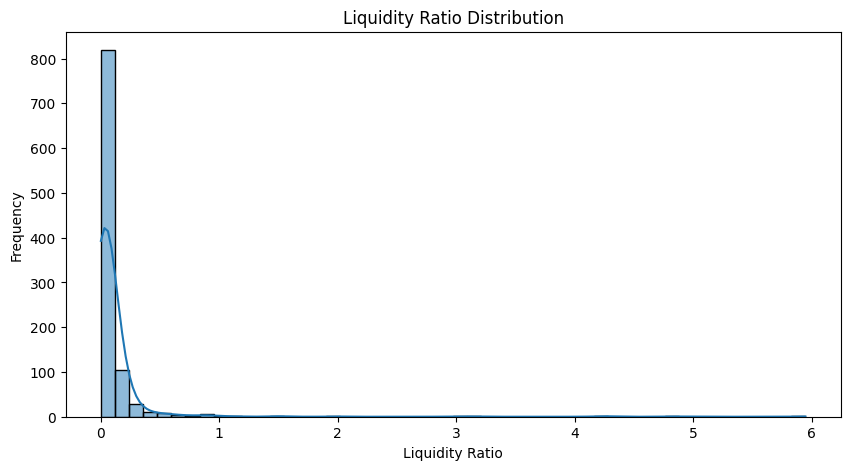

In [19]:
# Step 3: Plot distribution of Liquidity Ratio
plt.figure(figsize=(10, 5))
sns.histplot(df['liquidity_ratio'], bins=50, kde=True)
plt.title('Liquidity Ratio Distribution')
plt.xlabel('Liquidity Ratio')
plt.ylabel('Frequency')
plt.show()

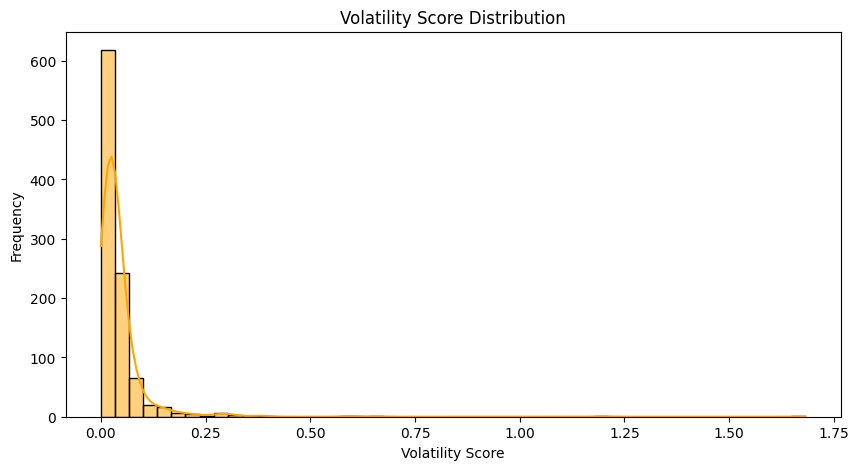

In [20]:
# Step 4: Plot Volatility Score distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['volatility_score'], bins=50, kde=True, color='orange')
plt.title('Volatility Score Distribution')
plt.xlabel('Volatility Score')
plt.ylabel('Frequency')
plt.show()

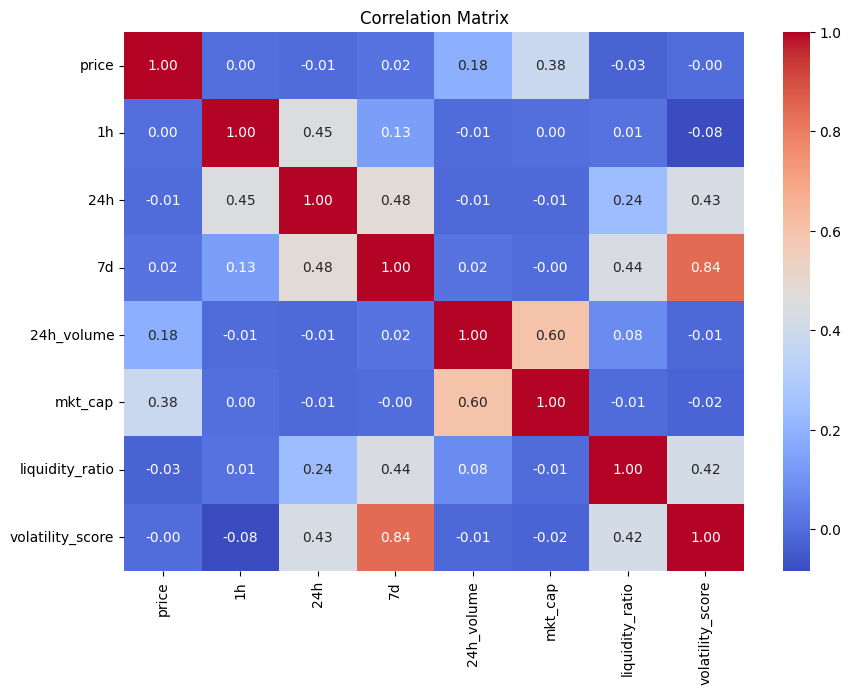

In [21]:
# Step 5: Correlation Heatmap
plt.figure(figsize=(10, 7))
corr = df[['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'liquidity_ratio', 'volatility_score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

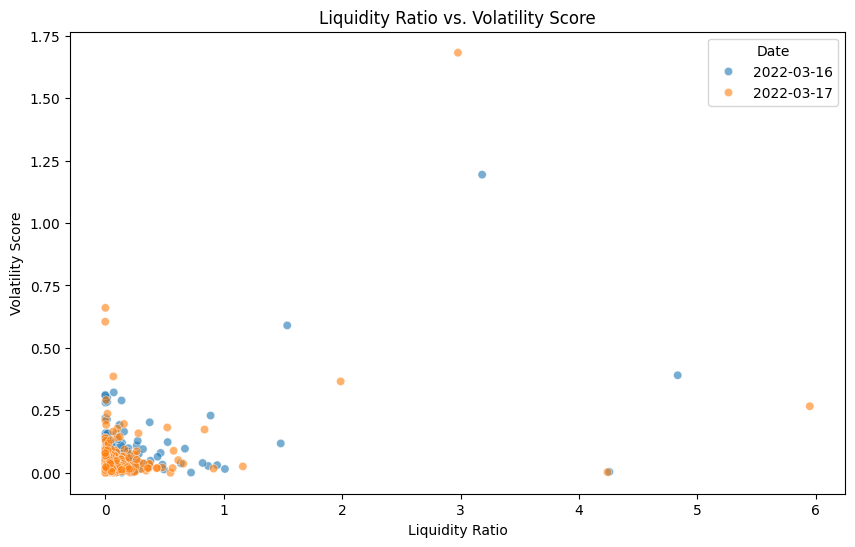

In [22]:
# Step 6: Scatter Plot: Liquidity vs. Volatility
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='liquidity_ratio', y='volatility_score', hue='date', alpha=0.6)
plt.title('Liquidity Ratio vs. Volatility Score')
plt.xlabel('Liquidity Ratio')
plt.ylabel('Volatility Score')
plt.legend(title='Date')
plt.show()

In [23]:
# Step 7: Top 10 Coins by Market Cap (per date)
top_mktcap = df.groupby('date').apply(lambda x: x.nlargest(10, 'mkt_cap')).reset_index(drop=True)

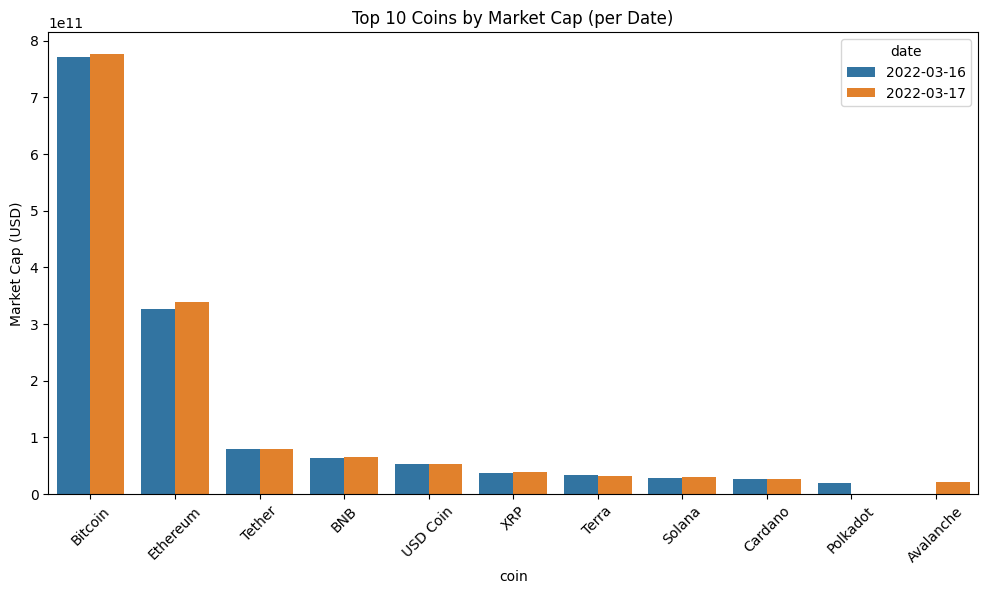

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_mktcap, x='coin', y='mkt_cap', hue='date')
plt.title('Top 10 Coins by Market Cap (per Date)')
plt.xticks(rotation=45)
plt.ylabel('Market Cap (USD)')
plt.show()